# Linear Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
tf.random.set_seed(1)

Text(0.5, 1.0, 'Linear Regression Problem')

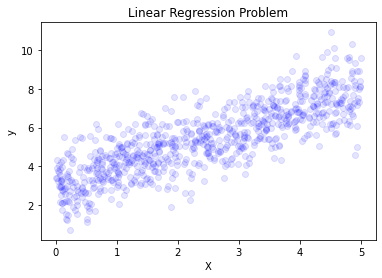

In [2]:
# generation of synthetic dataset for regression problem
num_points = 1000
a = 1
b = 3
noise = np.random.normal(0.0, 1.0, num_points)
X = np.random.uniform(0.0, 5.0, num_points)
y = a * X + b + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Problem')

In [3]:
# build model
input_dim = 1
input = keras.Input(shape=(input_dim,))
output = layers.Dense(1, activation = None)(input)
model = keras.Model(input, output)
model.compile(optimizer='sgd', loss = 'mse')

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs = 20, verbose = 0)

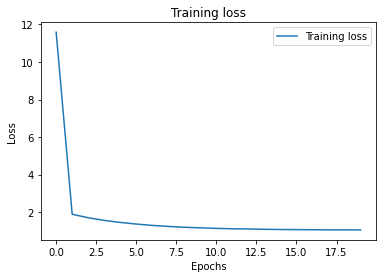

In [6]:
history_dict = history.history
train_loss_values = history_dict["loss"]

plt.plot(train_loss_values, label="Training loss")

plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [7]:
y_model = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Problem')

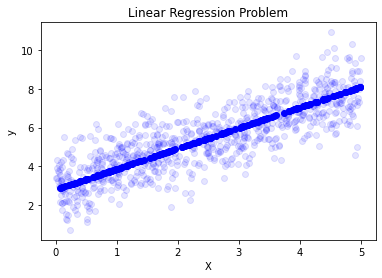

In [8]:
# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.plot(X_test, y_model, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Problem')

In [9]:
for layer in model.layers: print(layer.get_weights())

[]
[array([[1.0596454]], dtype=float32), array([2.806908], dtype=float32)]


## NonLinear Regression

Text(0.5, 1.0, 'NonLinear Regression Problem')

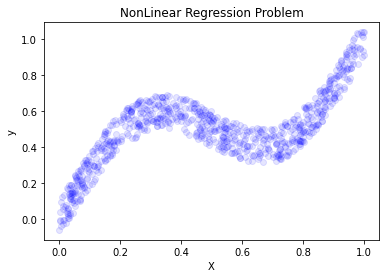

In [10]:
# generation of synthetic dataset for regression problem
num_points = 1000
X = np.random.uniform(0., 1., (num_points,1)).astype(np.float32)
noise = np.random.uniform(-0.1, 0.1, size=(num_points,1)).astype(np.float32)
y = X + 0.3 * np.sin(2 * np.pi * X) + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('NonLinear Regression Problem')

In [11]:
# build model
input_dim = 1
input = keras.Input(shape=(input_dim,))
layer1 = layers.Dense(16, activation = 'tanh')(input)
output = layers.Dense(1, activation = None)(layer1)
model = keras.Model(input, output)
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss = 'mse')

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs = 1000, verbose = 0)

In [14]:
y_model = model.predict(X_test)

Text(0.5, 1.0, 'NonLinear Regression Problem')

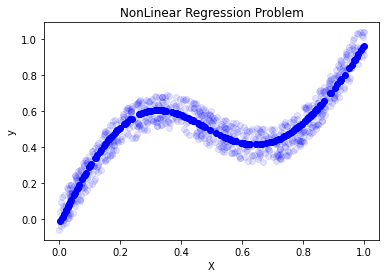

In [15]:
# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.plot(X_test, y_model, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('NonLinear Regression Problem')

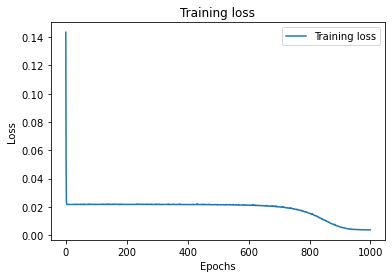

In [16]:
history_dict = history.history
train_loss_values = history_dict["loss"]

plt.plot(train_loss_values, label="Training loss")

plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


Text(0.5, 1.0, 'NonLinear Regression Problem')

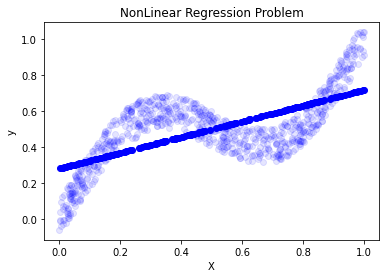

In [17]:
# Do not forget about activation 
input_dim = 1
input = keras.Input(shape=(input_dim,))
layer1 = layers.Dense(16)(input) # !!!
output = layers.Dense(1, activation = None)(layer1)
model = keras.Model(input, output)
opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss = 'mse')

history = model.fit(X_train, y_train, epochs = 1000, verbose = 0)
y_model = model.predict(X_test)

# plot data
plt.plot(X_train, y_train, 'bo', alpha = 0.1)
plt.plot(X_test, y_model, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('NonLinear Regression Problem')